## Jupyter notebook‘e nubraižyti:

1. Line grafiką kiekvieno mėnesio 2013 metų oro temperatūros vidurkį.

2. Line grafiką kiekvieno mėnesio 2014 metų oro temperatūros vidurkį.

3. Line grafiką kiekvieno mėnesio 2015 metų oro temperatūros vidurkį.

4. Bar grafiką metinio 2013-2015 metų oro temperatūros vidurkį.

5. Lentelėje atvaizduoti karščiausią kiekvienų metų dieną ir temperatūrą.

6. Lentelėje atvaizduoti šalčiausią kiekvienų metų dieną ir temperatūrą.


### Used libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Get data from file

In [4]:
def get_df(year):
    return pd.read_csv('Environmental_Data_Deep_Moor_{}.csv'.format(year))

In [5]:
def monthly_avg_calc(month, column):
    return df[df['date'].str.contains('201[2345]_[0]?' + str(month))][column].mean()

In [6]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

In [7]:
df = get_df('2013')

In [9]:
df.head()

,date,time,Air_Temp,Barometric_Press,Dew_Point,Relative_Humidity,Wind_Dir,Wind_Gust,Wind_Speed
0,2013_01_01,0:03:23,30.8,28.3,21.3,67.4,98.6,4,0.0
1,2013_01_01,6:29:08,28.0,28.4,24.2,85.2,61.8,2,0.0
2,2013_01_01,6:35:16,28.1,28.4,24.6,86.6,52.2,1,0.0
3,2013_01_01,6:41:25,28.1,28.4,24.6,86.4,62.8,2,0.0
4,2013_01_01,6:47:33,28.0,28.4,24.3,85.6,45.6,2,0.2


### Average Air temp by months 2013 year

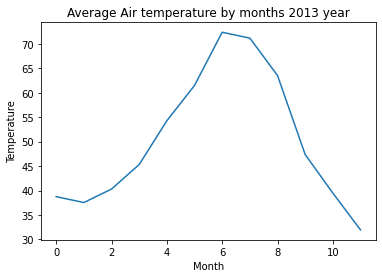

In [9]:
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Air temperature by months 2013 year')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

### Average Air temp by months 2014 year

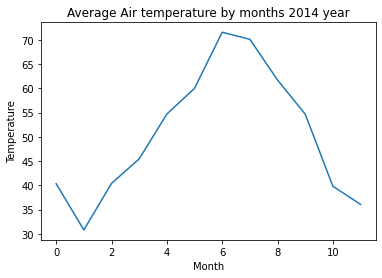

In [10]:
df = get_df('2014')
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Air temperature by months 2014 year')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

### Average Air temp by months 2015 year

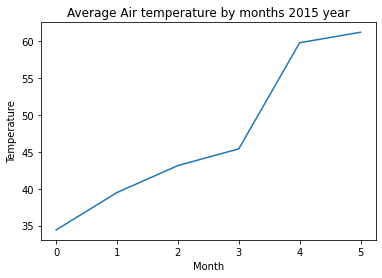

In [12]:
df = get_df('2015')
plt.plot(yearly_avg('Air_Temp'))
plt.title('Average Air temperature by months 2015 year')
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [60]:
def get_df(year):
    return pd.read_csv('Environmental_Data_Deep_Moor_{}.csv'.format(year))

### Bar char Average temperature 2013-2015 year

In [14]:
def get_years(year1, year2, year3):
    df1 = get_df(year1)
    df2 = get_df(year2)
    df3 = get_df(year3)
    return [df1[df1['date'].between('{}_01_01'.format(year1), '{}_12_31'.format(year1))],
            df2[df2['date'].between('{}_01_01'.format(year2), '{}_12_31'.format(year2))],
            df3[df3['date'].between('{}_01_01'.format(year3), '{}_12_31'.format(year3))]]

In [15]:
heights = [year['Air_Temp'].mean() for year in get_years('2013', '2014', '2015')]

In [16]:
years = ['2013', '2014', '2015']

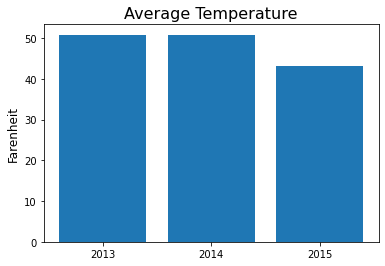

In [17]:
plt.bar(years, heights)
plt.title('Average Temperature', fontsize=16)
plt.ylabel('Farenheit', fontsize=12)
plt.show()

### Bar char Average temperature 2013-2015 year and table with min max

In [18]:
def max_temp(year):
    return year[year['Air_Temp']==year['Air_Temp'].max()]

In [19]:
def min_temp(year):
    return year[year['Air_Temp']==year['Air_Temp'].min()]

In [20]:
def min_man_temps(year1, year2, year3):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
        ) for s in get_years(year1, year2, year3)]

In [21]:
years = ['2013', '2014', '2015']
heights = [season['Air_Temp'].mean() for season in get_years('2013', '2014', '2015')]

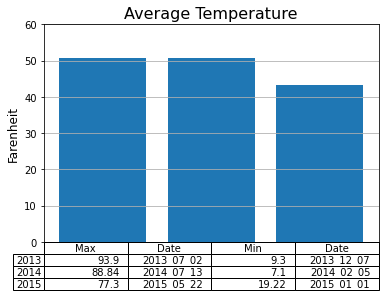

In [24]:
plt.bar(years, heights)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
rows = ['2013', '2014', '2015',]
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_man_temps('2013', '2014', '2015'),
         rowLabels=rows,
         colLabels=columns)
plt.xticks([])
plt.ylim(0,60)
plt.grid(True)
plt.show()